In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
titanic_train_data = pd.read_csv("train.csv")

In [4]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
corr_matrix = titanic_train_data.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

It looks like fare and Pclass have the largest ifluence on survival possibility. problem is they are continous values.

looking at fares below 300. there is an outlier at 500

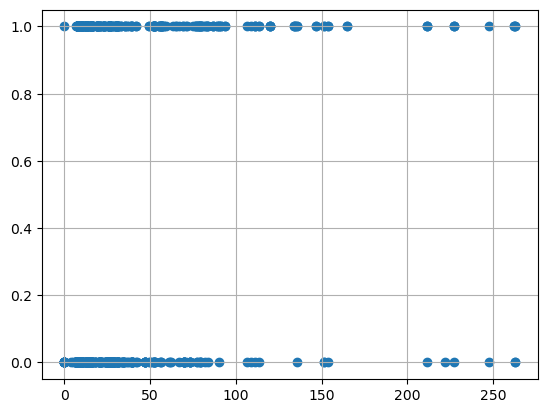

In [8]:
import matplotlib.pyplot as plt

fares_below_300 = titanic_train_data[titanic_train_data["Fare"] < 300]
plt.scatter(fares_below_300["Fare"], fares_below_300["Survived"])
plt.grid(visible=True)
plt.show()

### create fares categories every 50 points including infenity

In [9]:
fare_cats_bins = list(range(0, 301, 50))
fare_cats_bins_with_inf = fare_cats_bins + [np.inf]
print(fare_cats_bins)

[0, 50, 100, 150, 200, 250, 300]


In [10]:
len(fare_cats_bins)

7

In [11]:
len(fare_cats_bins_with_inf)

8

In [12]:
titanic_train_data_fare_cat = titanic_train_data.copy()
titanic_train_data_fare_cat["Fare_cat"] = pd.cut(
    titanic_train_data_fare_cat["Fare"],
    include_lowest=True,
    bins=pd.Series(fare_cats_bins_with_inf),
    labels=pd.Series(fare_cats_bins),
)
titanic_train_data_fare_cat["Fare_cat"] = titanic_train_data_fare_cat[
    "Fare_cat"
].astype(int)
titanic_train_data_fare_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Fare_cat     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [13]:
corr_matrix = titanic_train_data_fare_cat.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Fare_cat       0.237599
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

After all seems that fare_cat is less correlated than fare.

In [14]:
corr_matrix["Pclass"].sort_values(ascending=False)

Pclass         1.000000
SibSp          0.083081
Parch          0.018443
PassengerId   -0.035144
Survived      -0.338481
Age           -0.369226
Fare_cat      -0.515314
Fare          -0.549500
Name: Pclass, dtype: float64

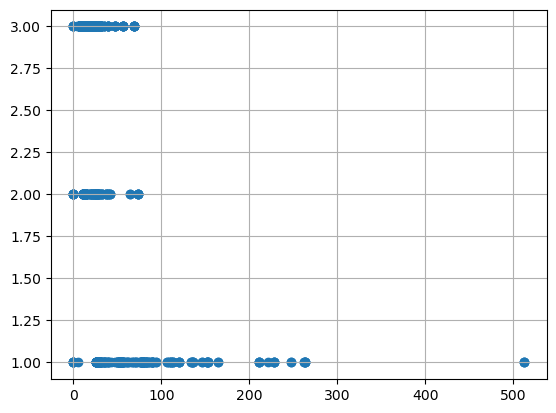

In [15]:
plt.scatter(titanic_train_data_fare_cat["Fare"], titanic_train_data_fare_cat["Pclass"])
plt.grid(visible=True)
plt.show()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Fare_cat'}>, <Axes: >]], dtype=object)

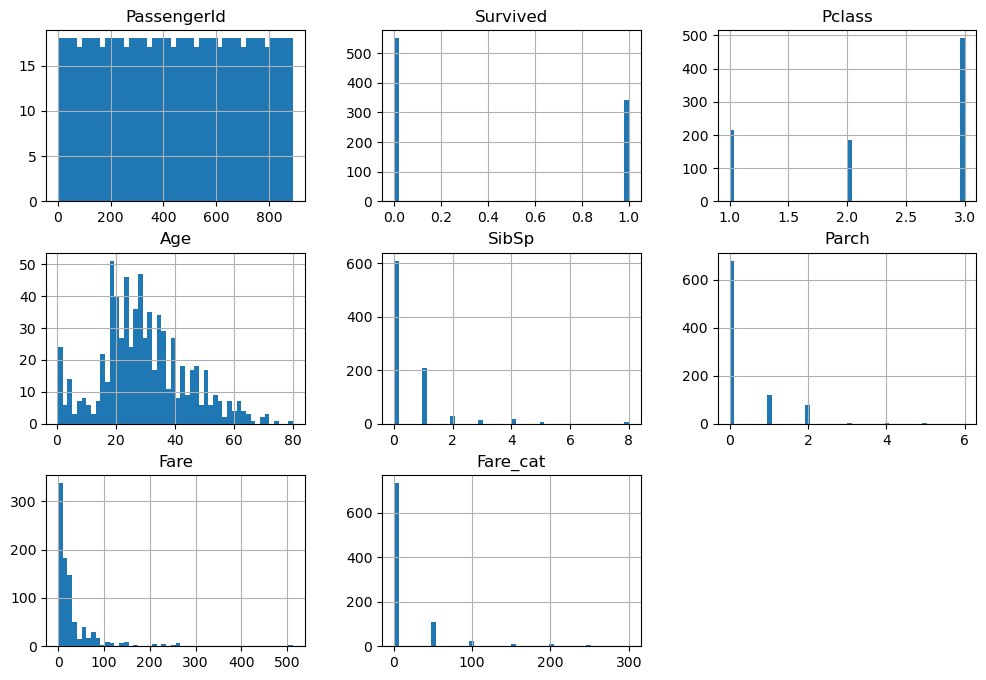

In [16]:
titanic_train_data_fare_cat.hist(bins=50, figsize=(12, 8))

conclusion: 
while it seems Pclass and fare_cat contain same info but this is not sure as the correlation matrix shows stronger correlation between fare and survived than fare_cat and survived. so we might need both. 
doing fare_cate is not a good idea after all

# doing the split with Pclass the strongest feature with correlation

In [17]:
train_set, test_set = train_test_split(
    titanic_train_data,
    test_size=0.2,
    random_state=0,
    stratify=titanic_train_data["Pclass"],
)

In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 866 to 830
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

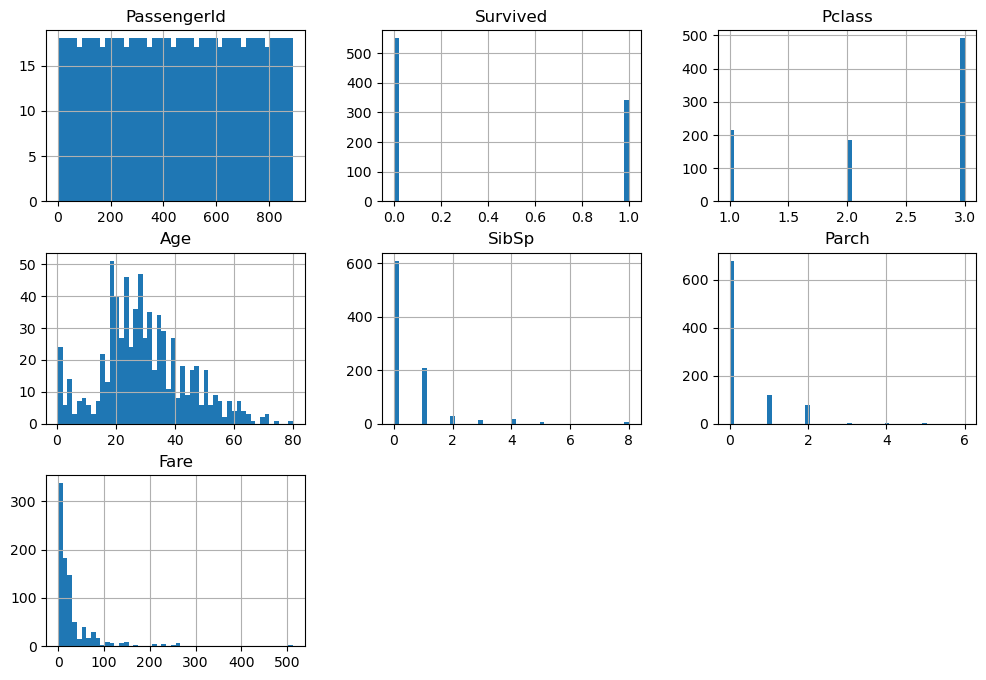

In [19]:
titanic_train_data.hist(bins=50, figsize=(12, 8))

In [20]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.255582
Parch          0.108767
PassengerId   -0.004916
SibSp         -0.035467
Age           -0.052296
Pclass        -0.340868
Name: Survived, dtype: float64

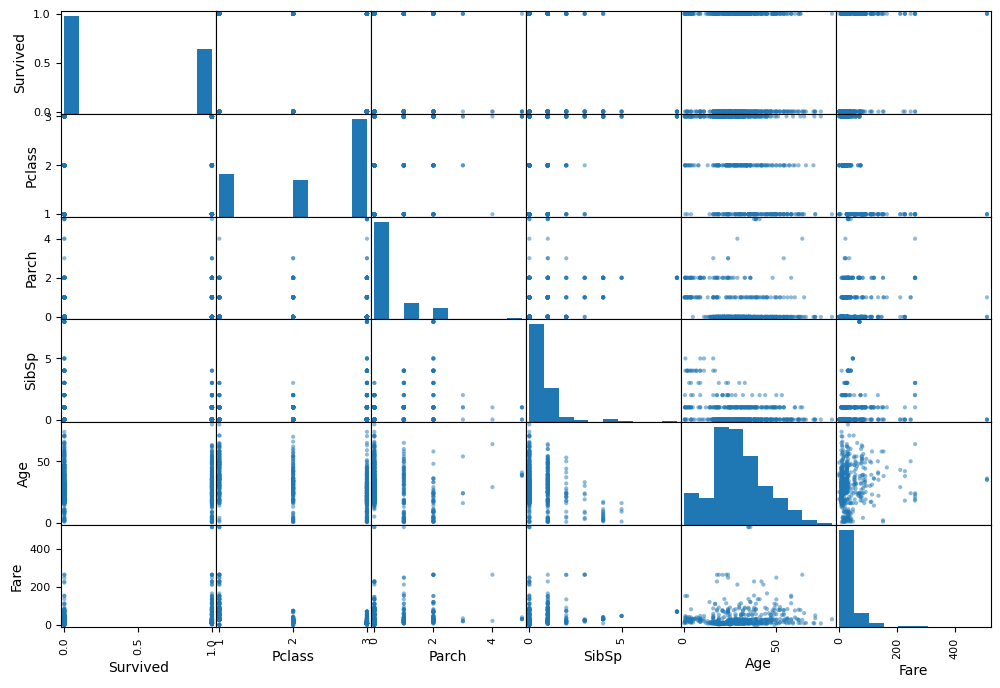

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Sex", "Pclass", "Parch", "SibSp", "Age", "Embarked", "Fare"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

very non-linear relations between values

Which columns have missing values?

In [22]:
colums_with_missing_values = train_set.columns[train_set.isnull().any()]
for col in colums_with_missing_values:
    print(f"column {col} has missing values")

column Age has missing values
column Cabin has missing values
column Embarked has missing values


Age, Cabin and Embarked contain missing values

we decide to drop cabin, ticket and name

In [23]:
train_set = train_set.drop(columns=["Cabin", "Name", "Ticket"])

This leaves us with only Age and Embarked columns with missing values. As we dont know what data we get in future in test set we get numerical columns names and fit imputer on them , same for non numerical

In [24]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy="median")

In [25]:
train_set_numeric = train_set.select_dtypes(include=[np.number])

In [26]:
numerical_imputer = numerical_imputer.fit(train_set_numeric)
train_set_numeric_imputed_ndarray = numerical_imputer.transform(train_set_numeric)

In [27]:
train_set_numeric = pd.DataFrame(
    train_set_numeric_imputed_ndarray,
    index=train_set_numeric.index,
    columns=train_set_numeric.columns,
)

now all numerics have no missing values

In [28]:
colums_with_missing_values = train_set_numeric.columns[train_set_numeric.isnull().any()]
for col in colums_with_missing_values:
    print(f"column {col} has missing values")

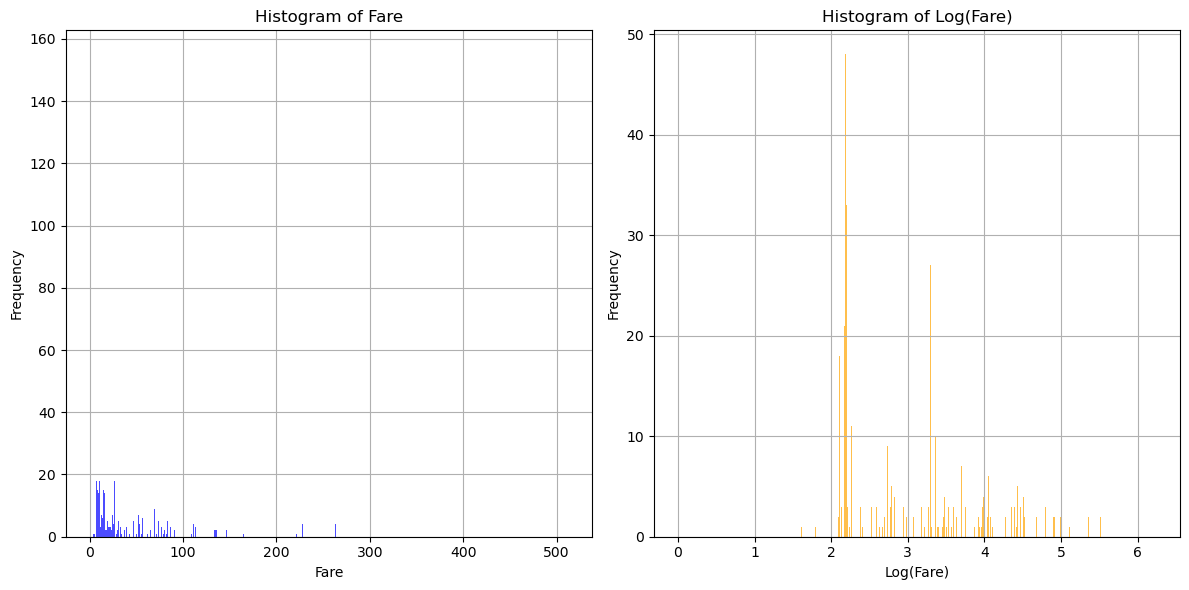

In [40]:
Fare_data = train_set["Fare"]

# Create subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot the histogram of the original data
axs[0].hist(Fare_data, bins=1000, color="blue", alpha=0.7)
axs[0].set_title("Histogram of Fare")
axs[0].set_xlabel("Fare")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

# Plot the histogram of the log-transformed data
log_fare_data = np.log(Fare_data + 1)
axs[1].hist(log_fare_data, bins=1000, color="orange", alpha=0.7)
axs[1].set_title("Histogram of Log(Fare)")
axs[1].set_xlabel("Log(Fare)")
axs[1].set_ylabel("Frequency")
axs[1].grid(True)

plt.tight_layout()

plt.show()

Now similar for non numeric

In [30]:
train_set_object = train_set.select_dtypes(include="object")
train_set_object.describe()

,Sex,Embarked
count,712,710
unique,2,3
top,male,S
freq,451,508


In [31]:
object_imputer = SimpleImputer(strategy="most_frequent")
object_imputer = object_imputer.fit(train_set_object)
train_set_object_imputed_ndarray = object_imputer.transform(train_set_object)

In [32]:
train_set_object = pd.DataFrame(
    train_set_object_imputed_ndarray,
    index=train_set_object.index,
    columns=train_set_object.columns,
)

In [33]:
train_set_object.describe()

,Sex,Embarked
count,712,712
unique,2,3
top,male,S
freq,451,510


One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False, drop="first"
)

In [35]:
oneHotEncoder.fit(train_set_object)

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [36]:
train_set_object_ohe_ndarray = oneHotEncoder.transform(train_set_object)

In [ ]:
train_set_object = pd.DataFrame(
    train_set_object_ohe_ndarray,
    index=train_set_object.index,
    columns=oneHotEncoder.get_feature_names_out(["Sex", "Embarked"]),
)

# Start composing pipelines and transformers

We saw Fare is better with logs as it was skewed to the right

In [ ]:
def getLogPlusOne(fare):
    return np.log(fare + 1)

## Fare transformer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

fare_transformer = Pipeline(
    steps=[
        ("log_plus_1", FunctionTransformer(getLogPlusOne, validate=True)),
        ("standard_scaler", StandardScaler),
    ]
)